In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp_stat #Génération des données selon une loi de Poisson

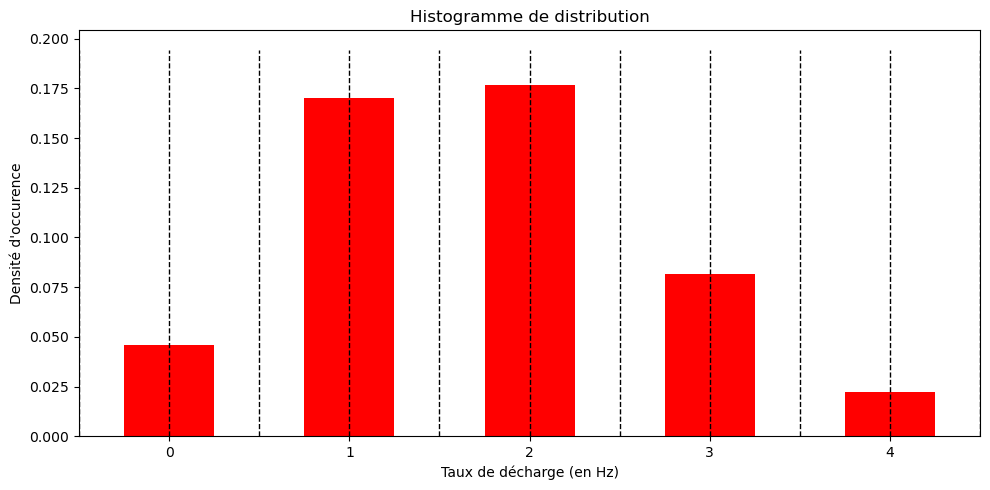

In [2]:
mu_ni=4
loc=0
nbr_neuron=100000
nbr_bins=10
#Ajouter un FR_max constant à chaque fois ! permettant d'augmenter le binage mais toujours sur le mêm intervalle
ni=sp_stat.poisson.rvs(mu=mu_ni,loc=loc,size=nbr_neuron)
#ni=sp_stat.norm.rvs(loc=mu_ni,size=nbr_neuron)
p_ni,bin_ni=np.histogram(ni,bins=nbr_bins,range=(0,nbr_bins),density=True)
bin_mid_ni=1/2*(np.sum((bin_ni[1:],bin_ni[:-1]),axis=0))
fig,ax=plt.subplots(figsize=(10,5))
ax.bar(x=bin_mid_ni,height=p_ni,width=1,color="red")
ax.vlines(x=[x for x in range(nbr_bins+1)],ymin=0,ymax=p_ni.max()+0.1*p_ni.max(),color="black",linestyle="dashed",lw=1)
ax.set_xticks(np.linspace(bin_mid_ni[0],bin_mid_ni[-1],nbr_bins),range(nbr_bins))
ax.set_xlim(0,nbr_bins)
ax.set_xlabel("Taux de décharge (en Hz)")
ax.set_ylabel("Densité d'occurence")
ax.set_title("Histogramme de distribution")
plt.tight_layout()
plt.show()

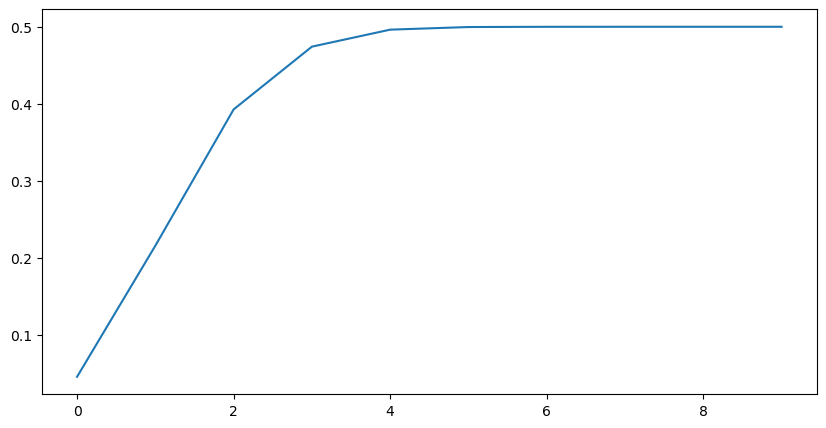

In [3]:
P_ni=np.cumsum(p_ni)
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(range(nbr_bins),P_ni) #bin_mid_ni
plt.show()

[0.1821 0.     0.7362 1.4618 7.6199 0.     0.     0.     0.     0.    ]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


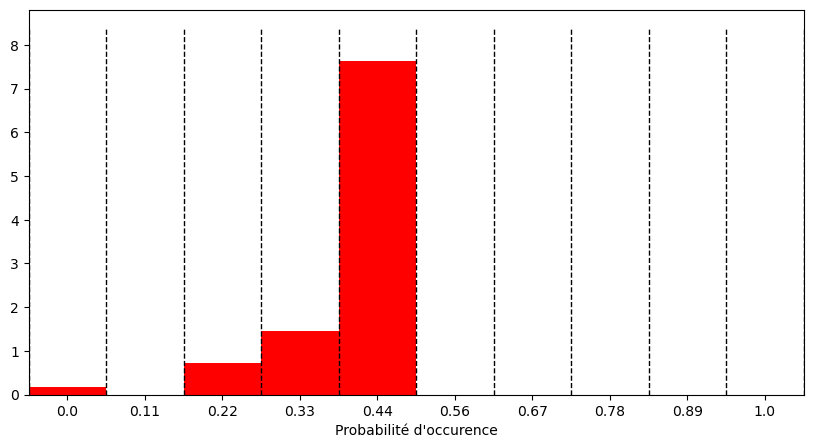

In [4]:
ni_interp=np.interp(ni,range(nbr_bins),P_ni)
p_ni_interp,bin_ni_interp=np.histogram(ni_interp,bins=nbr_bins,range=(0,1),density=True)
bin_mid_ni_interp=1/2*(np.sum((bin_ni_interp[1:],bin_ni_interp[:-1]),axis=0))
print(p_ni_interp)
print(bin_mid_ni_interp)

fig,ax=plt.subplots(figsize=(10,5))
ax.bar(x=bin_mid_ni_interp,height=p_ni_interp,width=1/(nbr_bins),color="red")
ax.vlines(x=[x for x in bin_ni_interp],ymin=0,ymax=p_ni_interp.max()+0.1*p_ni_interp.max(),color="black",linestyle="dashed",lw=1)
ax.set_xticks(np.linspace(bin_mid_ni_interp[0],bin_mid_ni_interp[-1],nbr_bins),[round(x,2) for x in np.linspace(0,1,nbr_bins)])
ax.set_xlim(bin_ni_interp[0],bin_ni_interp[-1])
ax.set_xlabel("Probabilité d'occurence")
ax.set_ylabel("")
plt.show()